# Modelo de Regresión Lineal Multivariable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy.stats import normaltest
from yellowbrick.regressor import ResidualsPlot

#### Carga de datos y filtrado de variables


In [23]:
train = pd.read_csv("train.csv")  

variables_clave = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    '1stFlrSF', 'FullBath', 'YearBuilt', 'KitchenAbvGr',
    'TotRmsAbvGrd', 'Fireplaces'
]

X = train[variables_clave]
y = train['SalePrice']


#### División entre train (70%) y test (30%)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42)

#### Ajuste de modelo de regresión lineal


In [ ]:
y_train_values = y_train.values  
y_test_values = y_test.values  

x_train_values = X_train.values  
x_test_values = X_test.values    

lm = LinearRegression()
lm.fit(x_train_values, y_train_values)

LinearRegression()

#### Predicción sobre el test set


In [27]:
y_test_pred = lm.predict(x_test_values)

#### Coeficiente (y = mx + c)


In [ ]:
c = lm.intercept_  
coeficientes = lm.coef_  

# Armar la ecuación de forma bonita
ecuacion = "SalePrice = "
for var, coef in zip(variables_clave, coeficientes):
    ecuacion += f"{coef:.4f} * {var} + "

# Agregar el intercepto al final
ecuacion += f"{c:.4f}"

# Mostrar la ecuación final
print(ecuacion)

SalePrice = 18481.5055 * OverallQual + 39.2383 * GrLivArea + 16177.5787 * GarageCars + 11.4395 * TotalBsmtSF + 15.8327 * 1stFlrSF + -438.9522 * FullBath + 341.3858 * YearBuilt + -31493.0990 * KitchenAbvGr + 2402.5124 * TotRmsAbvGrd + 8476.1972 * Fireplaces + -711569.4786


#### Gráfico de dispersión sobre la recta de regresión


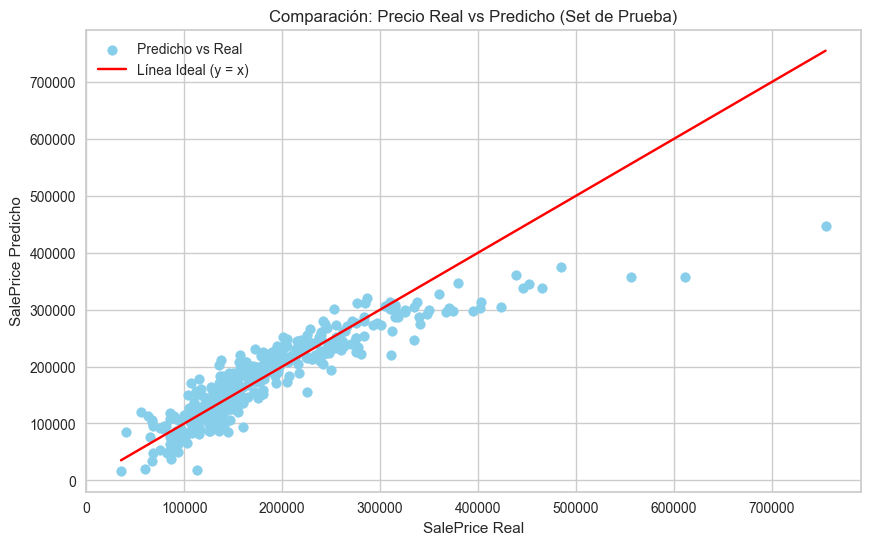

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test_values, y_test_pred, color='skyblue', label='Predicho vs Real')

plt.plot([min(y_test_values), max(y_test_values)], [min(y_test_values), max(y_test_values)],
         color="red", label='Línea Ideal (y = x)')

plt.xlabel("SalePrice Real")
plt.ylabel("SalePrice Predicho")
plt.title("Comparación: Precio Real vs Predicho (Set de Prueba)")
plt.legend()
plt.grid(True)
plt.show()

#### Métricas de evaluación


In [20]:
print("Mean Squared Error: %.2f" % mean_squared_error(y_test_values, y_test_pred))
print("R squared: %.2f" % r2_score(y_test_values, y_test_pred))

Mean Squared Error: 1395244926.01
R squared: 0.80


#### Calculo y muestra de residuales
